<center>Solar Panel Fault Detection</center>

## **Preliminary Analysis and overview of Solar Panel Image Data Set**

---



In [3]:
import kagglehub

path = kagglehub.dataset_download("kiyoshi732/faulty-solar-panel-images")

print("Path to dataset files:", path)

100%|██████████| 478M/478M [00:08<00:00, 60.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kiyoshi732/faulty-solar-panel-images/versions/1


In [4]:
data_path = "/root/.cache/kagglehub/datasets/kiyoshi732/faulty-solar-panel-images/versions/1/Faulty_solar_panel"

In [5]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from glob import glob

In [6]:
images = glob(os.path.join(data_path ,"**/*.jpg"), recursive = True)

In [7]:
len(images)

4283

In [8]:
class_names = os.listdir(data_path)

In [9]:
class_names

['Snow-Covered',
 'Bird-drop',
 'Dusty',
 'Electrical-damage',
 'Physical-Damage',
 'Clean']

In [10]:
row = 2
col = 3

In [11]:
from genericpath import isdir

folder_data = []

for folder in os.listdir(data_path):
  folder_path = os.path.join(data_path, folder)
  if os.path.isdir(folder_path):
    image_count = len(os.listdir(folder_path))
    folder_data.append({"Folder Name": folder, "Image Count":image_count})

In [12]:
df_images_count = pd.DataFrame(folder_data)

In [13]:
df_images_count

Folder Name  Image Count
0       Snow-Covered          424
1          Bird-drop          683
2              Dusty          651
3  Electrical-damage          318
4    Physical-Damage         1341
5              Clean          948

Text(0, 0.5, 'Image Count')

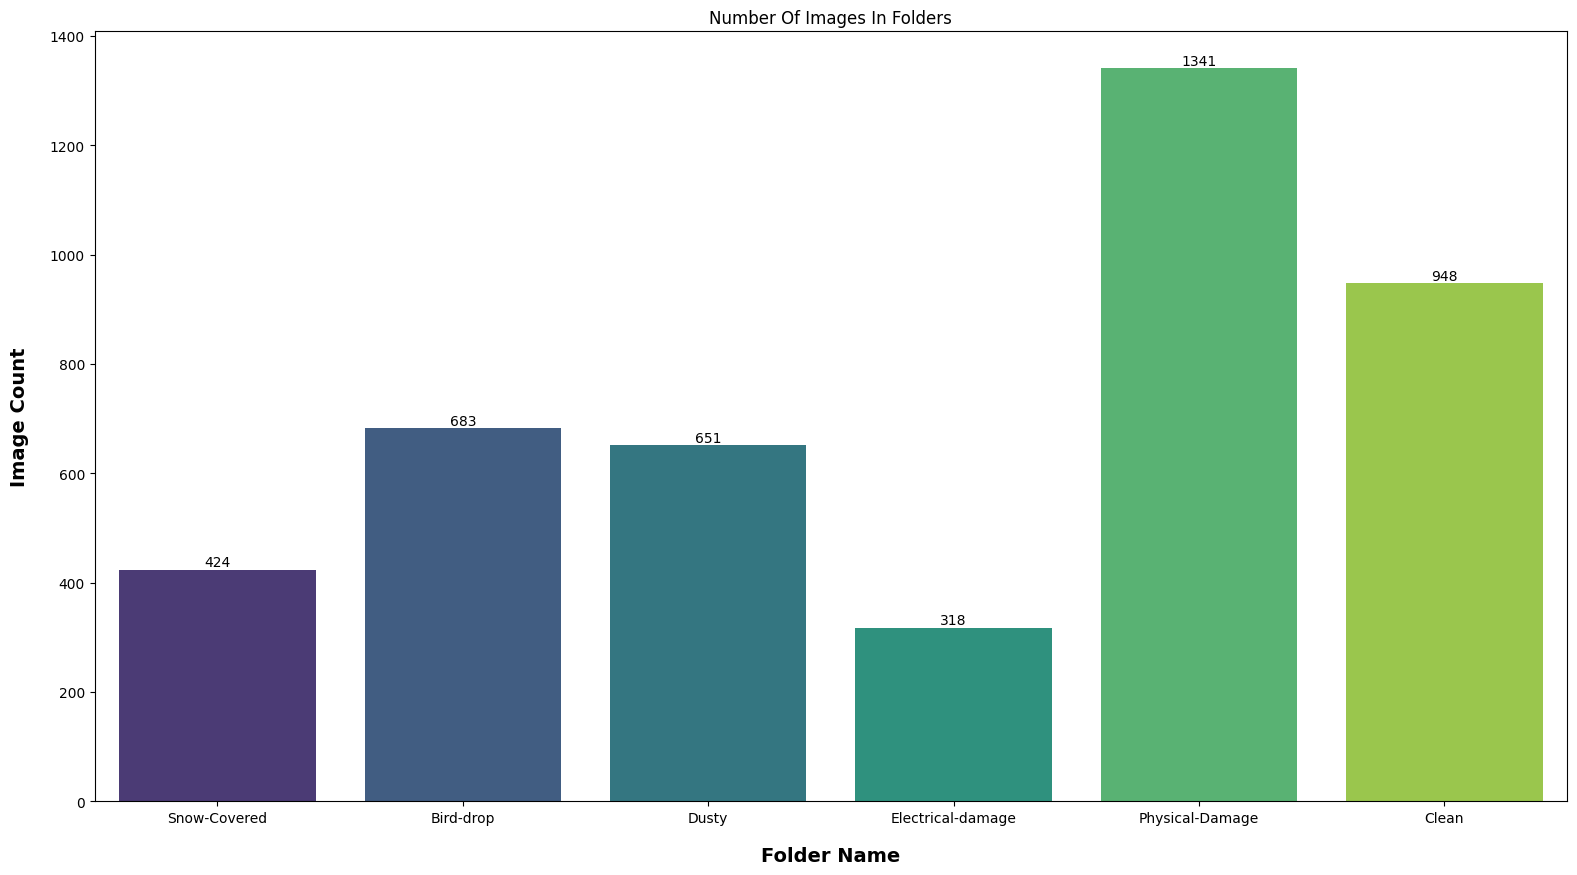

In [14]:
# @title Distribution of Image Counts per Class
plt.figure(figsize=(19,10))

ax = sns.barplot(df_images_count, x = "Folder Name", y = "Image Count", estimator = "sum", palette ="viridis", hue = "Folder Name")
plt.title("Number Of Images In Folders")

for container in ax.containers:
  ax.bar_label(container, fontsize = 10)

plt.xlabel("Folder Name", fontsize =14, fontweight = "bold", labelpad = 15)
plt.ylabel("Image Count", fontsize =14, fontweight = "bold", labelpad = 15)

In [15]:
img_sizes = []
img_classes = []

for img_path in images:
    img = cv2.imread(img_path)
    if img is not None:
      height, width = img.shape[:2]
      img_sizes.append((width, height))

      class_name = img_path.split("/")[-2]
      img_classes.append(class_name)

df_sizes = pd.DataFrame(img_sizes, columns=["Width", "Height"])
df_sizes["Class"] = img_classes

In [16]:
df_sizes

Width  Height         Class
0       224     159  Snow-Covered
1       224     113  Snow-Covered
2       800     600  Snow-Covered
3       640     640  Snow-Covered
4      2048    1536  Snow-Covered
...     ...     ...           ...
4278   1024     576         Clean
4279   1536    2048         Clean
4280    160     223         Clean
4281    224     149         Clean
4282    224     149         Clean

[4283 rows x 3 columns]

# **Image Distribution Analysis**

---



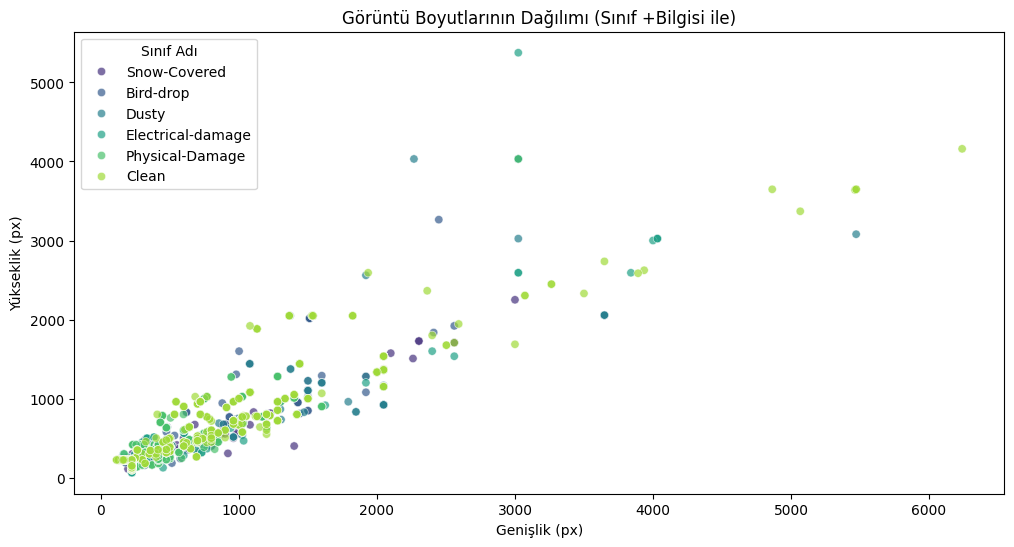

In [17]:
# @title Distribution of Image Sizes by Class
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_sizes, x="Width", y="Height", hue="Class", palette="viridis", alpha=0.7)

plt.title("Görüntü Boyutlarının Dağılımı (Sınıf +Bilgisi ile)")
plt.xlabel("Genişlik (px)")
plt.ylabel("Yükseklik (px)")
plt.legend(title="Sınıf Adı")
plt.show()

In [18]:
large_images = []

for img_path in images:
    img = cv2.imread(img_path)
    if img is not None:
        height, width = img.shape[:2]
        if width > 4000 or height > 4000:
            large_images.append((img_path, width, height))

df_large = pd.DataFrame(large_images, columns=["Image Path", "Width", "Height"])

In [19]:
df_large

Image Path  Width  Height
0   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   3024    4032
1   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   2268    4032
2   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5472    3080
3   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   4032    3024
4   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   3024    4032
5   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   3024    5376
6   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   4032    3024
7   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   4032    3024
8   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   3024    4032
9   /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5472    3648
10  /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5472    3648
11  /root/.cache/kagglehub/datasets/kiyoshi732/fau...   4864    3648
12  /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5067    3370
13  /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5464    3640
14  /root/.cache/kagglehub/datasets/kiyoshi732/fau...   5472    3648
15  /root/.cache/kagglehub/datasets/kiyoshi732/fau...   6240    4160

In [20]:
df_large.shape[0]

16

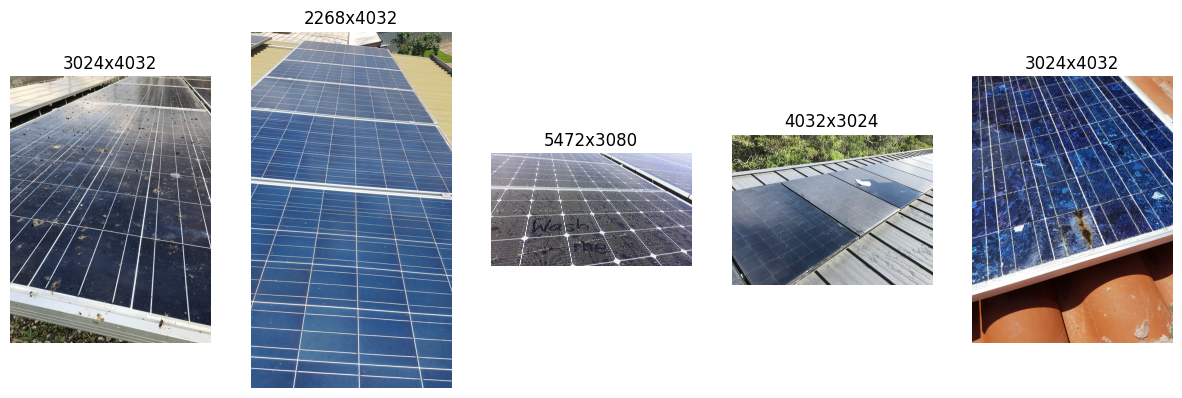

In [21]:
# @title Visualization of Outlier Image Resolutions
fig, axs = plt.subplots(1, min(len(large_images), 5), figsize=(15, 5))

for i, (img_path, width, height) in enumerate(large_images[:5]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    axs[i].imshow(img)
    axs[i].set_title(f"{width}x{height}")
    axs[i].axis("off")

plt.show()

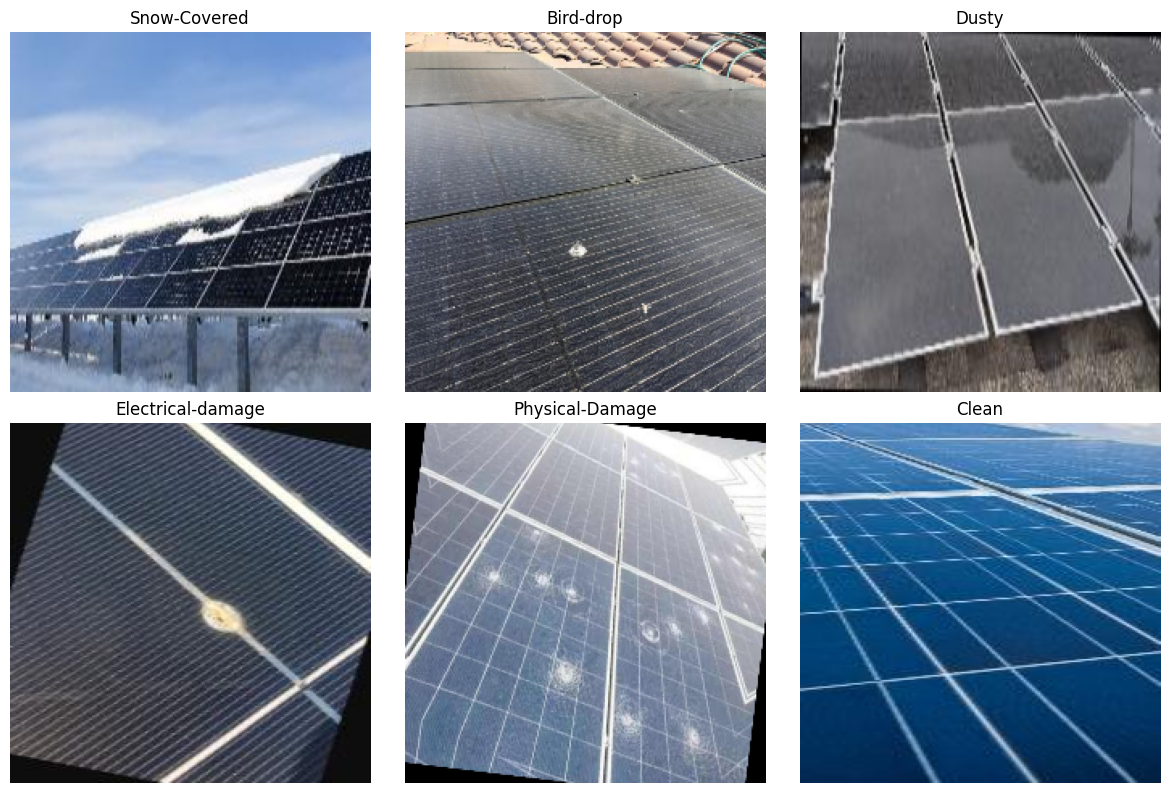

In [22]:
# @title Sample Images for Different Defect Types
fig, axs = plt.subplots(row, col, figsize=(12, 8))
axs = axs.flatten()

for i, cls in enumerate(class_names):
    img_paths = glob(os.path.join(data_path, cls, "*.*"))

    if len(img_paths) > 0:
        img = cv2.imread(img_paths[0])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        axs[i].imshow(img)
    else:
        axs[i].imshow(np.ones((224, 224, 3)), cmap="gray")
        axs[i].text(50, 112, "Görüntü Yok", fontsize=12, ha="center", va="center", color="red")

    axs[i].set_title(cls)
    axs[i].axis("off")

plt.tight_layout()
plt.show()

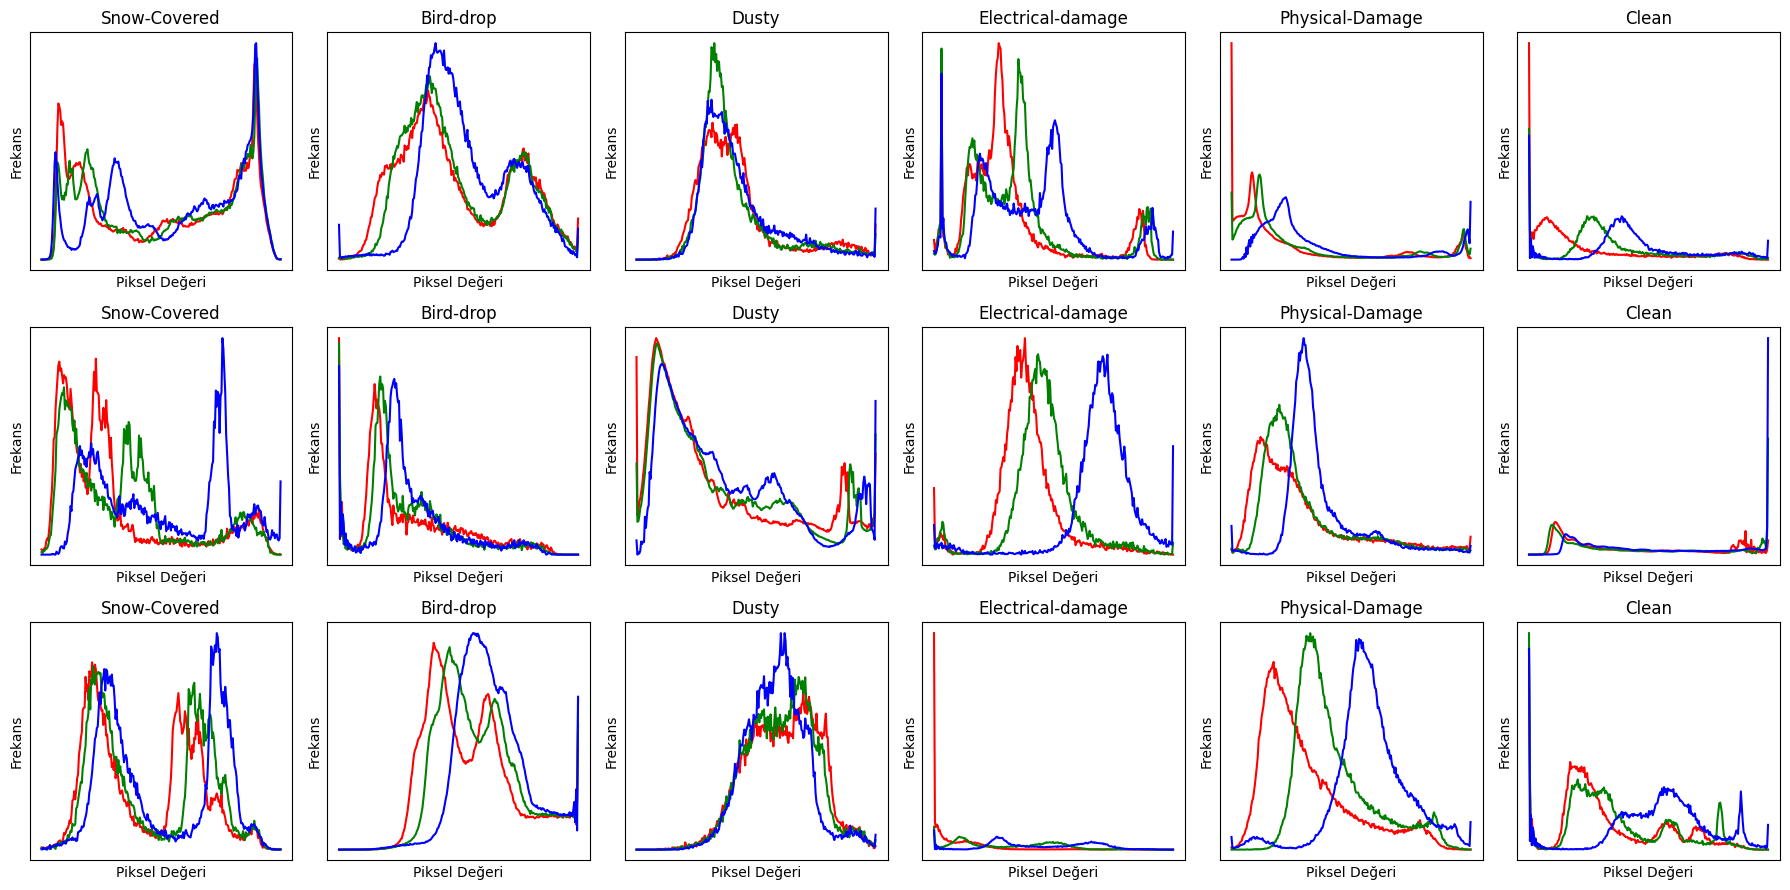

In [23]:
# @title RGB Histograms of Selected Images
import random

selected_images_per_class = {}
images_per_class = 3

for cls in class_names:
    img_paths = glob(os.path.join(data_path, cls, "*.jpg"))

    if len(img_paths) >= images_per_class:
        selected_images_per_class[cls] = random.sample(img_paths, images_per_class)
    elif len(img_paths) > 0:
        selected_images_per_class[cls] = img_paths
    else:
        selected_images_per_class[cls] = []

fig, axs = plt.subplots(3, 6, figsize=(18, 9))
axs = axs.T
axs = axs.flatten()

def plot_color_histogram(image_path, ax):
    if image_path is None:
        ax.axis("off")
        return

    img = cv2.imread(image_path)
    if img is None:
        ax.set_title("Hatalı Görsel")
        ax.axis("off")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        ax.plot(hist, color=color)

    ax.set_title(image_path.split('/')[-2])
    ax.set_xlabel("Piksel Değeri")
    ax.set_ylabel("Frekans")
    ax.set_xticks([])
    ax.set_yticks([])

index = 0
for cls in class_names:
    for img_path in selected_images_per_class.get(cls, []):
        plot_color_histogram(img_path, axs[index])
        index += 1

plt.tight_layout()
plt.show()

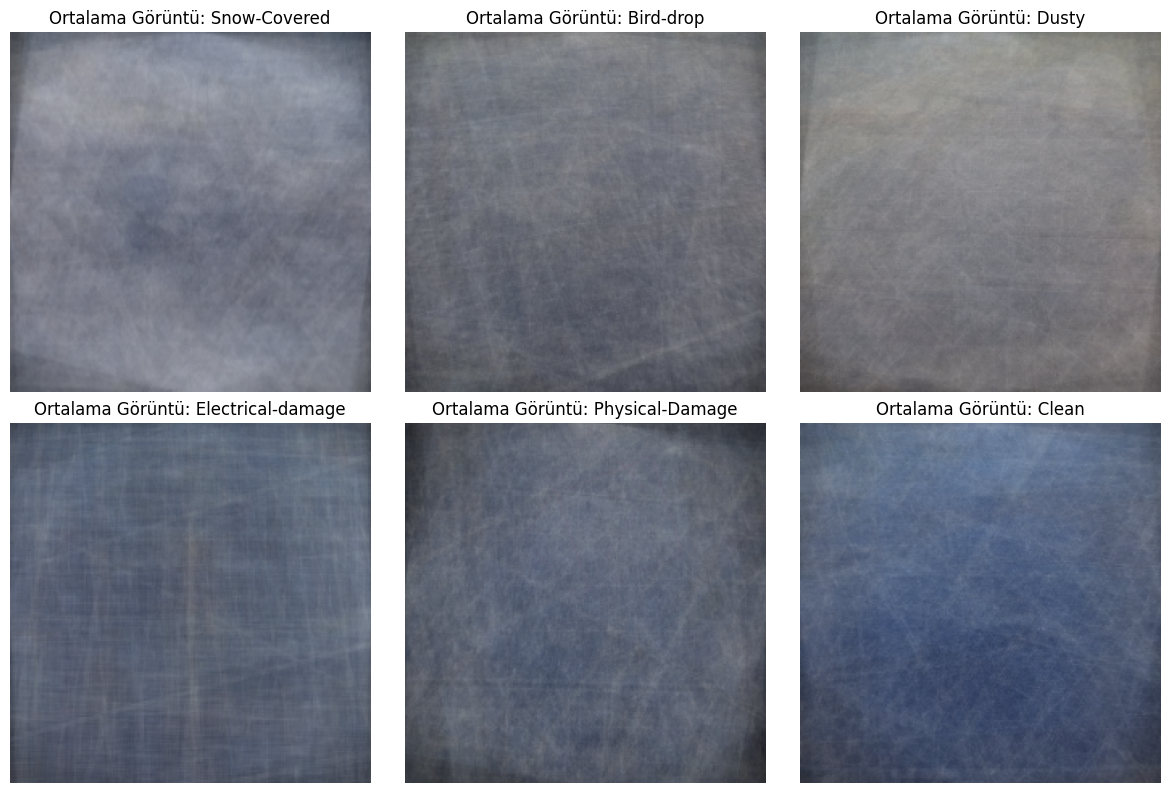

In [24]:
# @title Class-Wise Mean Pixel Value Representations
def compute_average_image(image_paths):
    images = [cv2.imread(img_path) for img_path in image_paths[:50]]
    images = [cv2.resize(img, (224, 224)) for img in images]
    avg_image = np.mean(images, axis=0).astype(np.uint8)
    return avg_image

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

for i, cls in enumerate(class_names):
    img_paths = glob(os.path.join(data_path, cls, "*.jpg"))
    if len(img_paths) > 0:
        avg_img = compute_average_image(img_paths)
        axs[i].imshow(cv2.cvtColor(avg_img, cv2.COLOR_BGR2RGB))
        axs[i].set_title(f"Ortalama Görüntü: {cls}")
        axs[i].axis("off")

plt.tight_layout()
plt.show()

# **Brightness & Contrast Analysis**

---



<ipython-input-25-7115818a2385>:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Sınıf Adı")


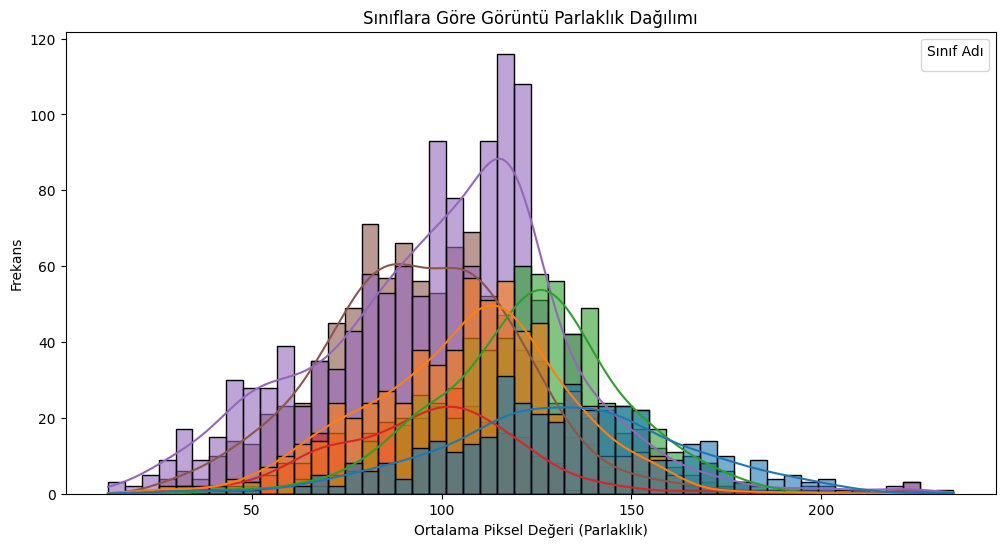

In [25]:
# @title Brightness Distribution Across Different Defect Types
brightness_data = {}

for cls in class_names:
    img_paths = glob(os.path.join(data_path, cls, "*.jpg"))

    if len(img_paths) > 0:
        brightness_values = []

        for img_path in img_paths:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            brightness_values.append(img.mean())

        brightness_data[cls] = brightness_values

df_brightness = pd.DataFrame(
    [(cls, b) for cls, values in brightness_data.items() for b in values],
    columns=["Class", "Brightness"]
)

plt.figure(figsize=(12, 6))
sns.histplot(data=df_brightness, x="Brightness", hue="Class", bins=50, kde=True, palette="tab10", alpha=0.6)

plt.title("Sınıflara Göre Görüntü Parlaklık Dağılımı")
plt.xlabel("Ortalama Piksel Değeri (Parlaklık)")
plt.ylabel("Frekans")
plt.legend(title="Sınıf Adı")
plt.show()

<ipython-input-26-21b3c8f4da37>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_contrast, x="Class", y="Contrast", palette="tab10")


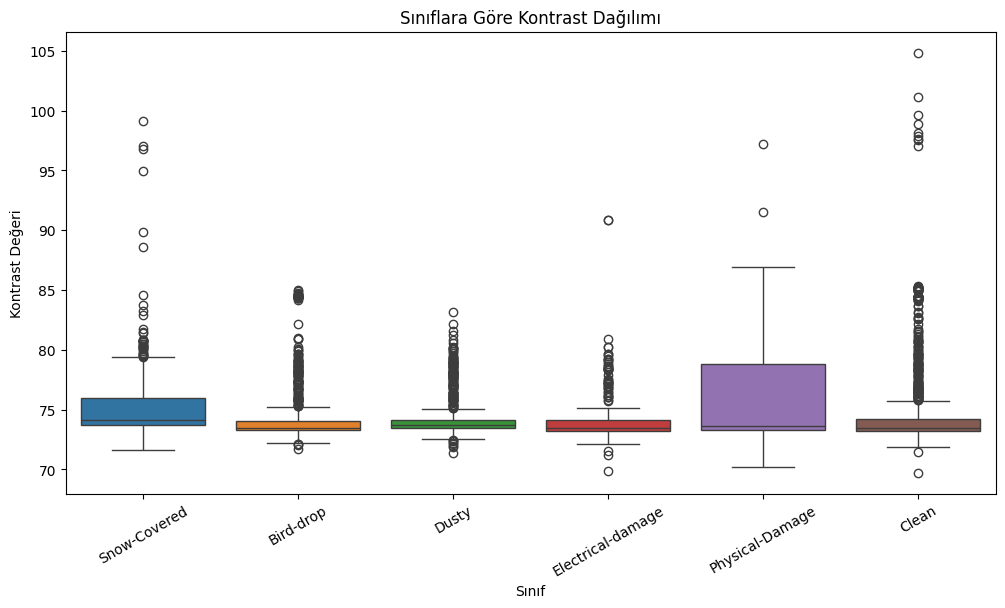

In [26]:
# @title Comparison of Contrast Values Across Classes
contrast_features = []

for img_path in images:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    img_eq = cv2.equalizeHist(img)
    contrast_value = np.std(img_eq)

    class_name = img_path.split("/")[-2]
    contrast_features.append([class_name, contrast_value])

df_contrast = pd.DataFrame(contrast_features, columns=["Class", "Contrast"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_contrast, x="Class", y="Contrast", palette="tab10")
plt.title("Sınıflara Göre Kontrast Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("Kontrast Değeri")
plt.xticks(rotation=30)
plt.show()

# **Texture & Edge Features**

---



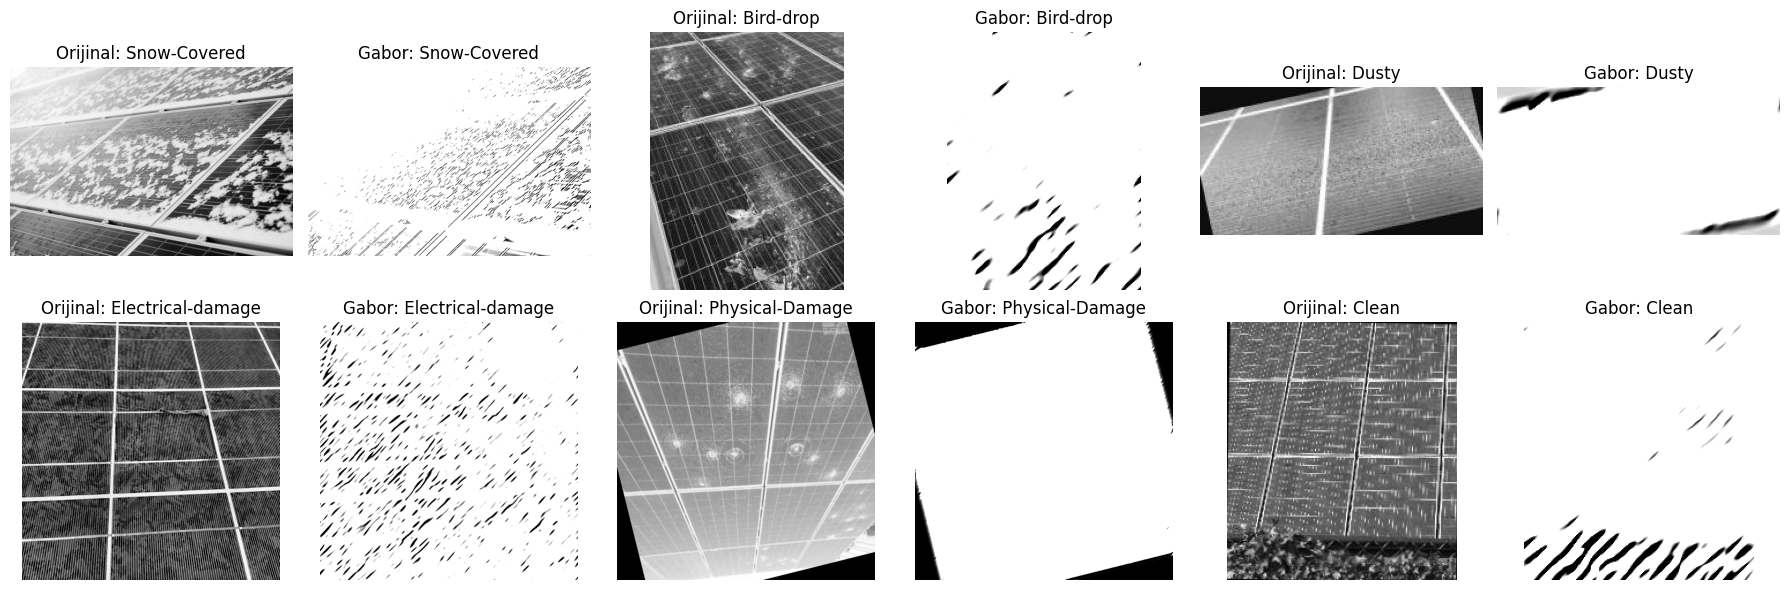

In [27]:
# @title Extracting Texture Features Using Gabor Filter
def apply_gabor_filter(img, ksize=31, sigma=4.0, theta=np.pi/4, lambd=10.0, gamma=0.5, psi=0):
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
    filtered_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
    return filtered_img

selected_images = {}
for cls in class_names:
    img_paths = glob(os.path.join(data_path, cls, "*.jpg"))
    if img_paths:
        selected_images[cls] = random.choice(img_paths)

fig, axs = plt.subplots(2, 6, figsize=(18, 6))
axs = axs.flatten()

for i, (cls, img_path) in enumerate(selected_images.items()):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    gabor = apply_gabor_filter(img)

    axs[i * 2].imshow(img, cmap='gray')
    axs[i * 2].set_title(f"Orijinal: {cls}")
    axs[i * 2].axis("off")

    axs[i * 2 + 1].imshow(gabor, cmap='gray')
    axs[i * 2 + 1].set_title(f"Gabor: {cls}")
    axs[i * 2 + 1].axis("off")

plt.tight_layout()
plt.show()

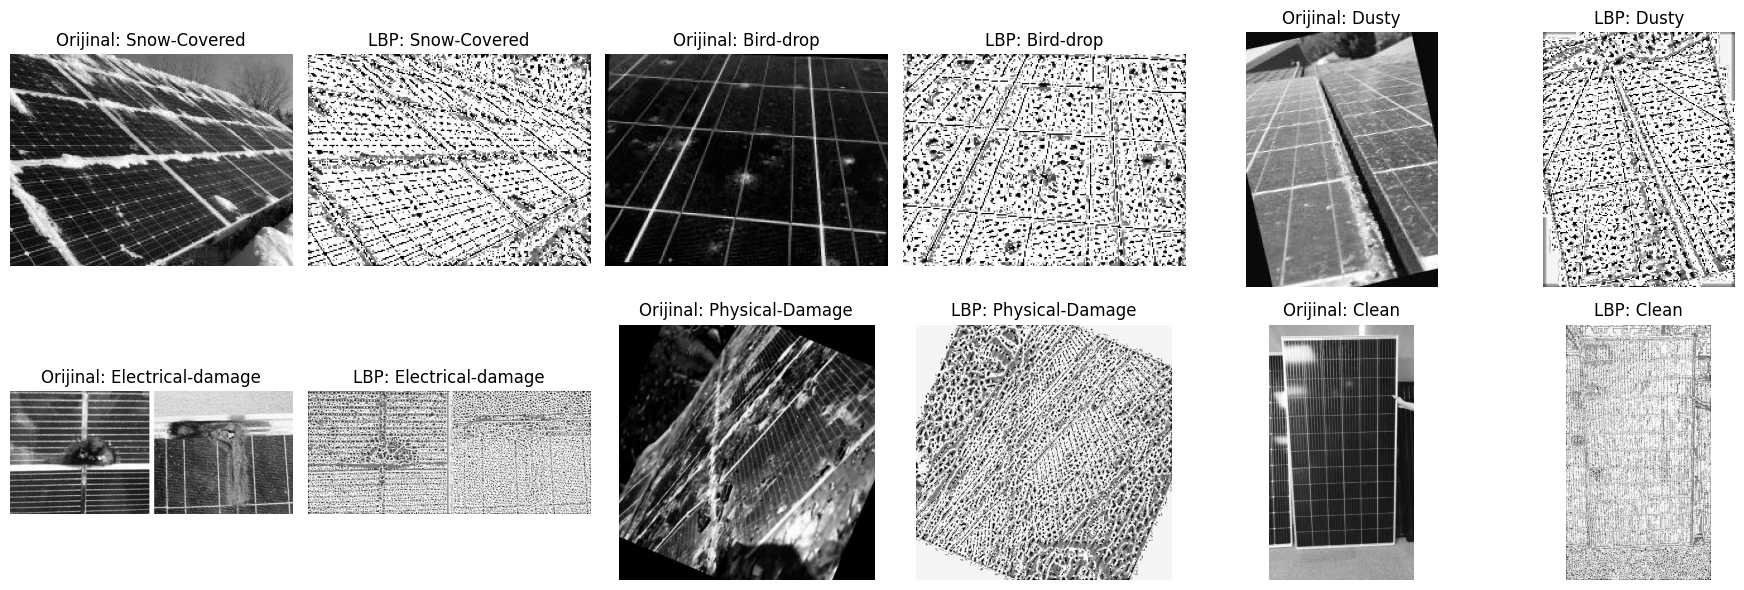

In [28]:
# @title Extracting Texture Features Using LBP
from skimage.feature import local_binary_pattern

radius = 3
n_points = 8 * radius
method = 'uniform'

selected_images = {}
for cls in class_names:
    img_paths = glob(os.path.join(data_path, cls, "*.jpg"))
    if img_paths:
        selected_images[cls] = random.choice(img_paths)

fig, axs = plt.subplots(2, 6, figsize=(18, 6))
axs = axs.flatten()

for i, (cls, img_path) in enumerate(selected_images.items()):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    lbp = local_binary_pattern(img, n_points, radius, method)

    axs[i * 2].imshow(img, cmap='gray')
    axs[i * 2].set_title(f"Orijinal: {cls}")
    axs[i * 2].axis("off")

    axs[i * 2 + 1].imshow(lbp, cmap='gray')
    axs[i * 2 + 1].set_title(f"LBP: {cls}")
    axs[i * 2 + 1].axis("off")

plt.tight_layout()
plt.show()

<ipython-input-29-a243bc740cb9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_edges, x="Class", y="Edge Density", palette="tab10")


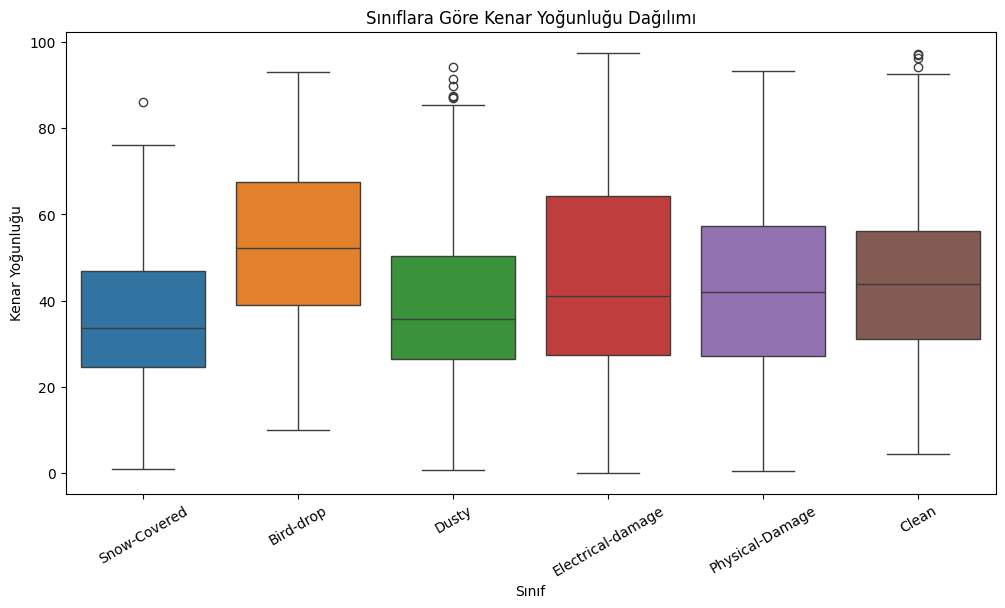

In [29]:
# @title Comparison of Edge Density Across Classes
edge_features = []

for img_path in images:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, 100, 200)

    edge_density = np.sum(edges) / edges.size
    class_name = img_path.split("/")[-2]

    edge_features.append([class_name, edge_density])

df_edges = pd.DataFrame(edge_features, columns=["Class", "Edge Density"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_edges, x="Class", y="Edge Density", palette="tab10")
plt.title("Sınıflara Göre Kenar Yoğunluğu Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("Kenar Yoğunluğu")
plt.xticks(rotation=30)
plt.show()

# **Feature Extraction**

---



<ipython-input-30-a065c8a8d766>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_hog, x="Class", y="Feature_0", palette="tab10")


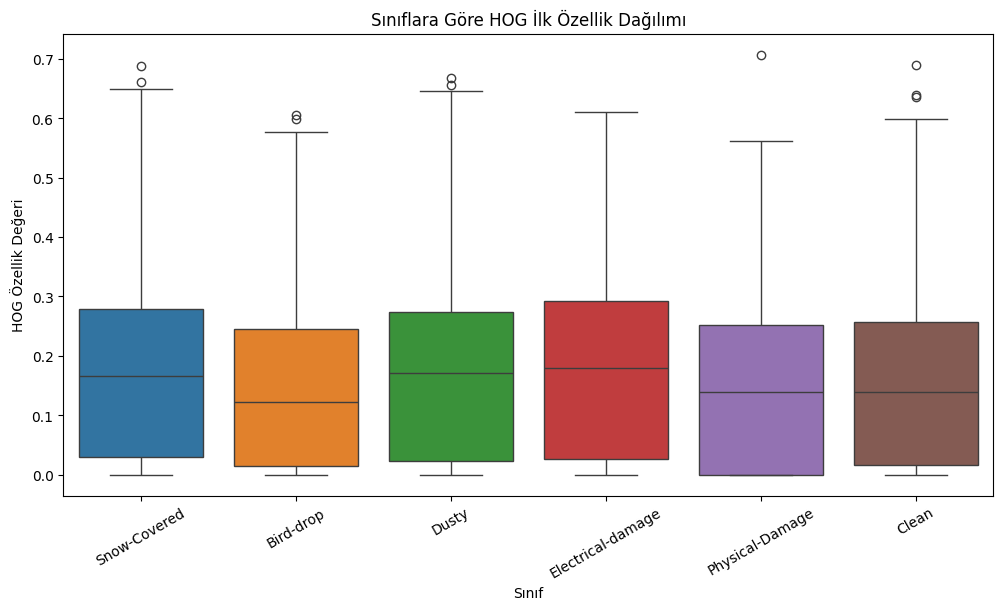

In [30]:
# @title Histogram of Oriented Gradients (HOG) Features by Class
from skimage.feature import hog

hog_features = []

for img_path in images:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))

    features, _ = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

    class_name = img_path.split("/")[-2]
    hog_features.append([class_name, *features])

df_hog = pd.DataFrame(hog_features)
df_hog.columns = ["Class"] + [f"Feature_{i}" for i in range(df_hog.shape[1] - 1)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_hog, x="Class", y="Feature_0", palette="tab10")
plt.title("Sınıflara Göre HOG İlk Özellik Dağılımı")
plt.xlabel("Sınıf")
plt.ylabel("HOG Özellik Değeri")
plt.xticks(rotation=30)
plt.show()

<ipython-input-31-6b894e69112f>:7: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(fshift))
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
<ipython-input-31-6b894e69112f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_fft, x="Class", y="Mean_FFT", palette="tab10")


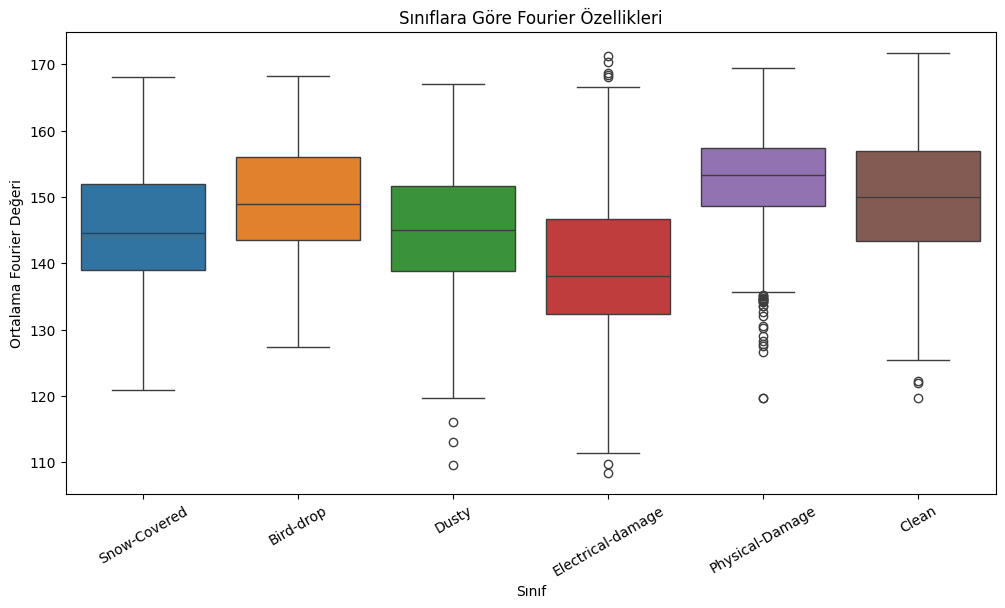

In [31]:
# @title Mean Fourier Transform Features by Class
def compute_fft_features(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    return np.mean(magnitude_spectrum), np.std(magnitude_spectrum)

fft_features = []

for img_path in images:
    mean_fft, std_fft = compute_fft_features(img_path)
    class_name = img_path.split("/")[-2]
    fft_features.append([class_name, mean_fft, std_fft])

df_fft = pd.DataFrame(fft_features, columns=["Class", "Mean_FFT", "Std_FFT"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fft, x="Class", y="Mean_FFT", palette="tab10")
plt.title("Sınıflara Göre Fourier Özellikleri")
plt.xlabel("Sınıf")
plt.ylabel("Ortalama Fourier Değeri")
plt.xticks(rotation=30)
plt.show()

<ipython-input-32-f74ce0b7f3af>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_color, x="Class", y="Mean_R", palette="Reds", ax=axs[0])
<ipython-input-32-f74ce0b7f3af>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_color, x="Class", y="Mean_G", palette="Greens", ax=axs[1])
<ipython-input-32-f74ce0b7f3af>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_color, x="Class", y="Mean_B", palette="Blues", ax=axs[2])


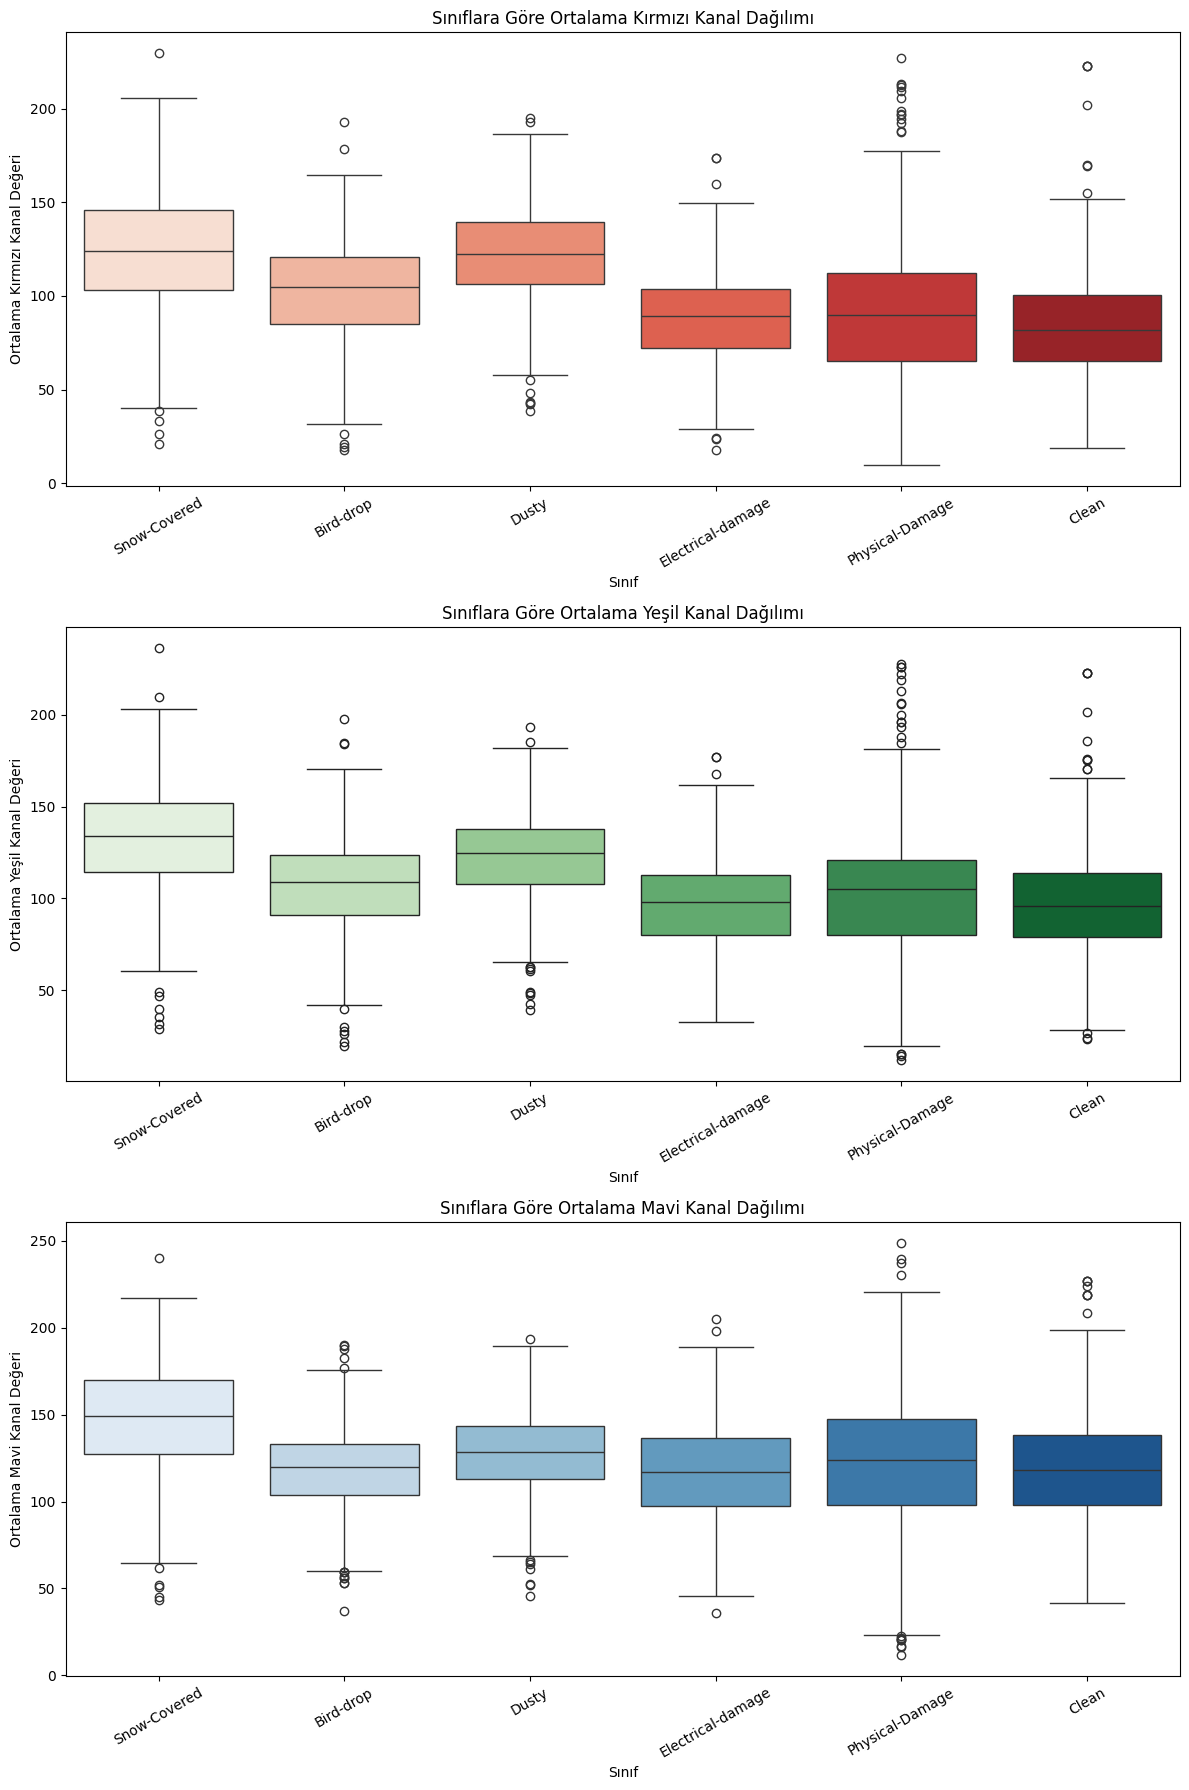

In [32]:
# @title Mean RGB Channel Intensity for Each Class
color_features = []

for img_path in images:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mean_color = np.mean(img, axis=(0, 1))
    std_color = np.std(img, axis=(0, 1))

    class_name = img_path.split("/")[-2]
    color_features.append([class_name, *mean_color, *std_color])

df_color = pd.DataFrame(color_features, columns=["Class", "Mean_R", "Mean_G", "Mean_B", "Std_R", "Std_G", "Std_B"])

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

sns.boxplot(data=df_color, x="Class", y="Mean_R", palette="Reds", ax=axs[0])
axs[0].set_title("Sınıflara Göre Ortalama Kırmızı Kanal Dağılımı")
axs[0].set_xlabel("Sınıf")
axs[0].set_ylabel("Ortalama Kırmızı Kanal Değeri")
axs[0].tick_params(axis='x', rotation=30)

sns.boxplot(data=df_color, x="Class", y="Mean_G", palette="Greens", ax=axs[1])
axs[1].set_title("Sınıflara Göre Ortalama Yeşil Kanal Dağılımı")
axs[1].set_xlabel("Sınıf")
axs[1].set_ylabel("Ortalama Yeşil Kanal Değeri")
axs[1].tick_params(axis='x', rotation=30)

sns.boxplot(data=df_color, x="Class", y="Mean_B", palette="Blues", ax=axs[2])
axs[2].set_title("Sınıflara Göre Ortalama Mavi Kanal Dağılımı")
axs[2].set_xlabel("Sınıf")
axs[2].set_ylabel("Ortalama Mavi Kanal Değeri")
axs[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


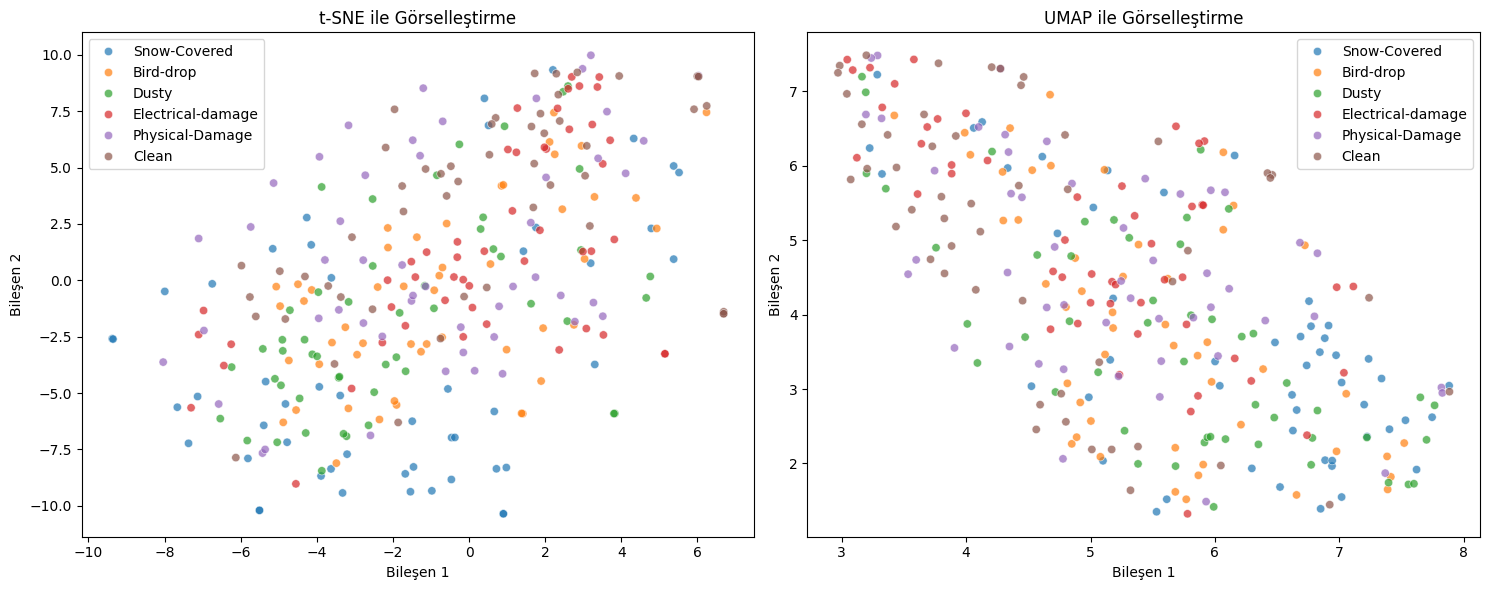

In [33]:
# @title Comparing t-SNE and UMAP: 2D Distribution of Images
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import LabelEncoder

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (224, 224))
    return img.flatten()

image_paths = []
labels = []

for cls in class_names:
    img_paths = glob(os.path.join(data_path, cls, "*.jpg"))
    sampled_paths = random.sample(img_paths, min(len(img_paths), 50))
    image_paths.extend(sampled_paths)
    labels.extend([cls] * len(sampled_paths))
img_data = np.array([preprocess_image(img) for img in image_paths])

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(img_data)

umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(img_data)
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=labels, palette="tab10", alpha=0.7, ax=axs[0])
axs[0].set_title("t-SNE ile Görselleştirme")
axs[0].set_xlabel("Bileşen 1")
axs[0].set_ylabel("Bileşen 2")
axs[0].legend(loc="best")

sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=labels, palette="tab10", alpha=0.7, ax=axs[1])
axs[1].set_title("UMAP ile Görselleştirme")
axs[1].set_xlabel("Bileşen 1")
axs[1].set_ylabel("Bileşen 2")
axs[1].legend(loc="best")

plt.tight_layout()
plt.show()

# **Preprocessing**

---



Toplam görüntü sayısı: 4283
Temizlenen görüntü sayısı: 4234
Kaldırılan outlier/hatalı görüntü sayısı: 49


<ipython-input-34-78ba10bbb473>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Clean Images", "Removed Images"], y=[len(clean_images), len(removed_images)], palette='viridis')


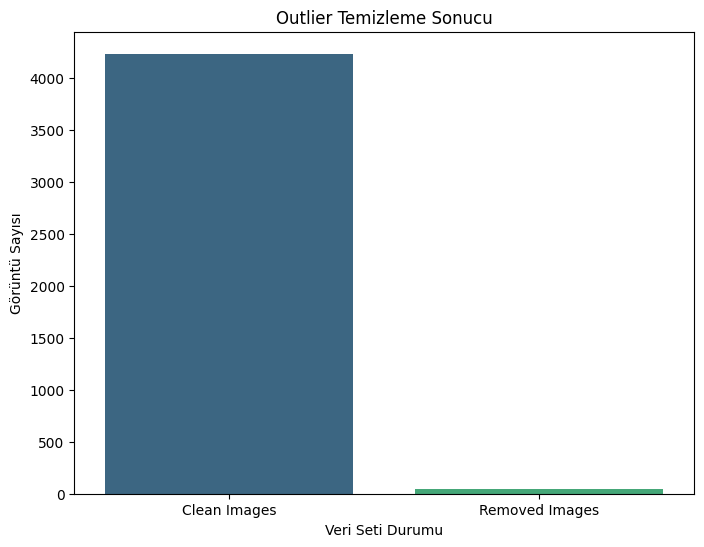

In [34]:
# @title Outlier Görüntüleri Tespit Edip Kaldırma

MIN_SIZE = (100, 100)
MAX_SIZE = (4000, 4000)

clean_images = []
removed_images = []

for img_path in images:
    try:
        img = cv2.imread(img_path)
        if img is None:
            raise ValueError("Görüntü okunamadı.")

        height, width = img.shape[:2]

        if width < MIN_SIZE[0] or height < MIN_SIZE[1] or width > MAX_SIZE[0] or height > MAX_SIZE[1]:
            removed_images.append(img_path)
        else:
            clean_images.append(img_path)
    except Exception as e:
        print(f"Hatalı görüntü: {img_path}, Hata: {e}")
        removed_images.append(img_path)

print(f"Toplam görüntü sayısı: {len(images)}")
print(f"Temizlenen görüntü sayısı: {len(clean_images)}")
print(f"Kaldırılan outlier/hatalı görüntü sayısı: {len(removed_images)}")

df_clean = pd.DataFrame(clean_images, columns=["Clean Images"])
df_removed = pd.DataFrame(removed_images, columns=["Removed Images"])

plt.figure(figsize=(8,6))
sns.barplot(x=["Clean Images", "Removed Images"], y=[len(clean_images), len(removed_images)], palette='viridis')
plt.title("Outlier Temizleme Sonucu")
plt.ylabel("Görüntü Sayısı")
plt.xlabel("Veri Seti Durumu")
plt.show()

In [35]:
# @title Data Augmentation

import albumentations as A
from tqdm import tqdm

TARGET_COUNT = 1000

transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.Rotate(limit=30, p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.GaussNoise(p=0.2),
    A.RandomGamma(p=0.2)
])

classes_to_augment = ['Electrical-damage', 'Snow-Covered', 'Dusty', 'Bird-drop']

for class_name in classes_to_augment:
    class_folder = os.path.join(data_path, class_name)
    images = glob(os.path.join(class_folder, '*.jpg'))

    current_count = len(images)
    images_needed = TARGET_COUNT - current_count

    print(f"Sınıf: {class_name}, Mevcut: {current_count}, Eklenecek: {images_needed}")

    for i in tqdm(range(images_needed), desc=f"Augmenting {class_name}"):
        img_path = random.choice(images)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        augmented = transform(image=img)['image']

        new_image_path = os.path.join(class_folder, f"augmented_{i}_{os.path.basename(img_path)}")
        augmented = cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR)
        cv2.imwrite(new_image_path, augmented)

print("\nVeri artırımı tamamlandı. Sınıf dağılımı dengelendi.")

Sınıf: Electrical-damage, Mevcut: 300, Eklenecek: 700


Augmenting Electrical-damage: 100%|██████████| 700/700 [00:17<00:00, 38.99it/s]


Sınıf: Snow-Covered, Mevcut: 405, Eklenecek: 595


Augmenting Snow-Covered: 100%|██████████| 595/595 [00:04<00:00, 119.54it/s]


Sınıf: Dusty, Mevcut: 649, Eklenecek: 351


Augmenting Dusty: 100%|██████████| 351/351 [00:06<00:00, 52.01it/s]


Sınıf: Bird-drop, Mevcut: 659, Eklenecek: 341


Augmenting Bird-drop: 100%|██████████| 341/341 [00:05<00:00, 65.68it/s]


Veri artırımı tamamlandı. Sınıf dağılımı dengelendi.


In [36]:
# @title Stratified Undersampling (Physical-Damage Sınıfı)

from sklearn.cluster import KMeans

TARGET_COUNT = 1020
class_name = "Physical-Damage"

class_folder = os.path.join(data_path, class_name)
images = glob(os.path.join(class_folder, "*.jpg"))

print(f"{class_name} sınıfında başlangıçta görüntü sayısı: {len(images)}")

def extract_hog_features(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    features, _ = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return features

features_list = []
for img_path in tqdm(images, desc="Extracting HOG features"):
    features = extract_hog_features(img_path)
    features_list.append(features)

kmeans = KMeans(n_clusters=TARGET_COUNT, random_state=42)
kmeans.fit(features_list)

selected_indices = []
for cluster_label in range(TARGET_COUNT):
    cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
    chosen_index = random.choice(cluster_indices)
    selected_indices.append(chosen_index)

images_to_remove = [images[i] for i in range(len(images)) if i not in selected_indices]

for img_path in images_to_remove:
    os.remove(img_path)

print(f"{class_name} sınıfından kaldırılan görüntü sayısı: {len(images_to_remove)}")
print(f"{class_name} sınıfında kalan görüntü sayısı: {len(selected_indices)}")

Physical-Damage sınıfında başlangıçta görüntü sayısı: 1333


Extracting HOG features: 100%|██████████| 1333/1333 [00:52<00:00, 25.43it/s]


Physical-Damage sınıfından kaldırılan görüntü sayısı: 313
Physical-Damage sınıfında kalan görüntü sayısı: 1020


# **Model Selection**

---



In [37]:
# @title Stratified Train-Validation-Test Split
import shutil
from sklearn.model_selection import train_test_split

base_output = "solar_panel_dataset_split"
os.makedirs(base_output, exist_ok=True)

for split in ["train", "val", "test"]:
    for class_name in class_names:
        os.makedirs(os.path.join(base_output, split, class_name), exist_ok=True)

train_ratio = 0.70
val_ratio = 0.15
test_ratio = 0.15

for class_name in class_names:
    class_folder = os.path.join(data_path, class_name)
    images = glob(os.path.join(class_folder, '*.jpg'))

    train_images, test_images = train_test_split(images, test_size=(val_ratio + test_ratio), random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

    for img in train_images:
        shutil.copy(img, os.path.join(base_output, 'train', class_name, os.path.basename(img)))

    for img in val_images:
        shutil.copy(img, os.path.join(base_output, 'val', class_name, os.path.basename(img)))

    for img in test_images:
        shutil.copy(img, os.path.join(base_output, 'test', class_name, os.path.basename(img)))

print("Train, Validation ve Test kümelerine başarıyla bölündü.")

Train, Validation ve Test kümelerine başarıyla bölündü.


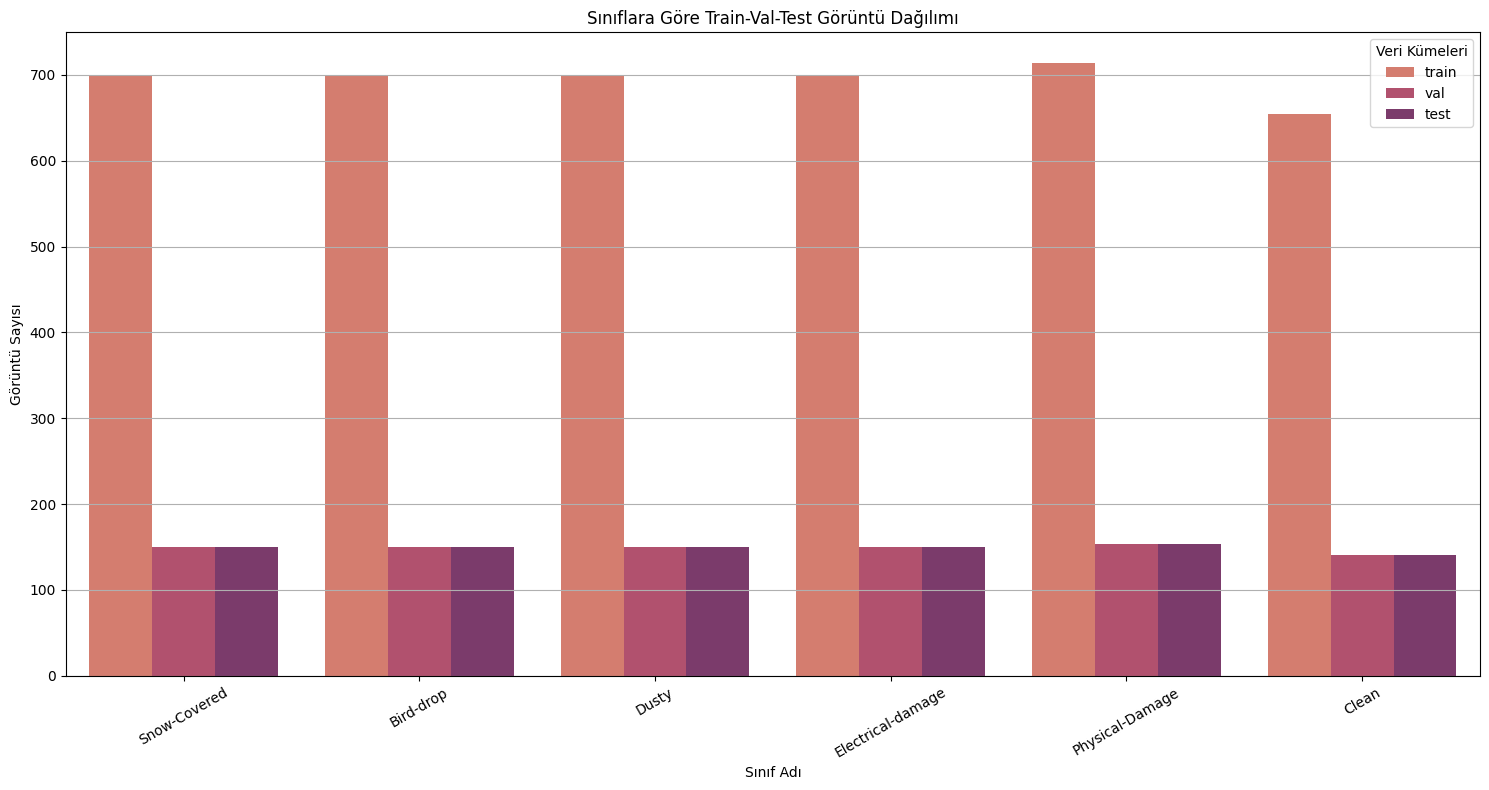

In [38]:
# @title Train-Val-Test Küme Dağılımı Barplot ile Gösterme
base_output = "solar_panel_dataset_split"
split_names = ['train', 'val', 'test']

data_distribution = []

for split in split_names:
    for class_name in class_names:
        folder_path = os.path.join(base_output, split, class_name)
        count = len(os.listdir(folder_path))
        data_distribution.append({'Split': split, 'Class': class_name, 'Image Count': count})

df_distribution = pd.DataFrame(data_distribution)

plt.figure(figsize=(15, 8))
sns.barplot(data=df_distribution, x='Class', y='Image Count', hue='Split', palette='flare')

plt.title('Sınıflara Göre Train-Val-Test Görüntü Dağılımı')
plt.xlabel('Sınıf Adı')
plt.ylabel('Görüntü Sayısı')
plt.xticks(rotation=30)
plt.legend(title='Veri Kümeleri')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [39]:
# @title Train-Val-Test Dataset Image Counts
base_output = "solar_panel_dataset_split"
splits = ['train', 'val', 'test']

for split in splits:
    print(f"\n{split.upper()} Kümesi:")
    for class_name in class_names:
        folder_path = os.path.join(base_output, split, class_name)
        if os.path.exists(folder_path):
            image_count = len(os.listdir(folder_path))
            print(f"{class_name}: {image_count} görüntü")
        else:
            print(f"{class_name}: klasör bulunamadı!")



TRAIN Kümesi:
Snow-Covered: 700 görüntü
Bird-drop: 700 görüntü
Dusty: 700 görüntü
Electrical-damage: 700 görüntü
Physical-Damage: 714 görüntü
Clean: 655 görüntü

VAL Kümesi:
Snow-Covered: 150 görüntü
Bird-drop: 150 görüntü
Dusty: 150 görüntü
Electrical-damage: 150 görüntü
Physical-Damage: 153 görüntü
Clean: 141 görüntü

TEST Kümesi:
Snow-Covered: 150 görüntü
Bird-drop: 150 görüntü
Dusty: 150 görüntü
Electrical-damage: 150 görüntü
Physical-Damage: 153 görüntü
Clean: 141 görüntü


In [40]:
import tensorflow as tf

base_output = "solar_panel_dataset_split"
IMG_SIZE = 224
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(base_output, 'train'),
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(base_output, 'val'),
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=False
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(base_output, 'test'),
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=False
)

class_names = train_ds.class_names
print("Classes:", class_names)

# Batch örneği
for images, labels in train_ds.take(1):
    print(f"Batch shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")


Found 4169 files belonging to 6 classes.
Found 894 files belonging to 6 classes.
Found 894 files belonging to 6 classes.
Classes: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']
Batch shape: (32, 224, 224, 3)
Labels shape: (32, 6)


In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (224, 224)
batch_size = 32
base_output = "solar_panel_dataset_split"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20
)

val_test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_gen = train_datagen.flow_from_directory(
    os.path.join(base_output, "train"),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_test_datagen.flow_from_directory(
    os.path.join(base_output, "val"),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_gen = val_test_datagen.flow_from_directory(
    os.path.join(base_output, "test"),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 4169 images belonging to 6 classes.
Found 894 images belonging to 6 classes.
Found 894 images belonging to 6 classes.
